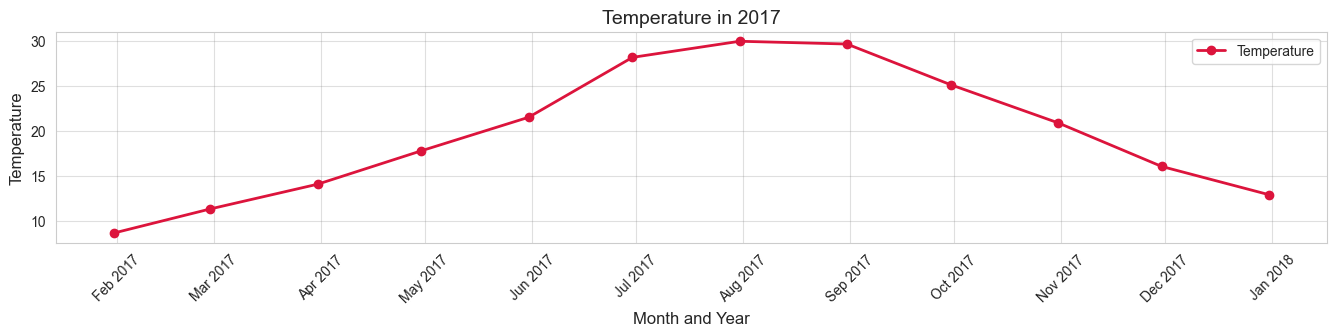

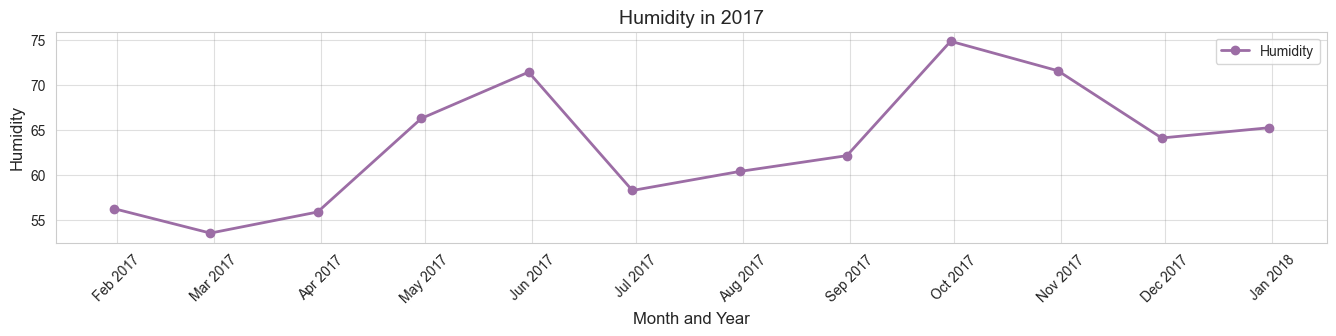

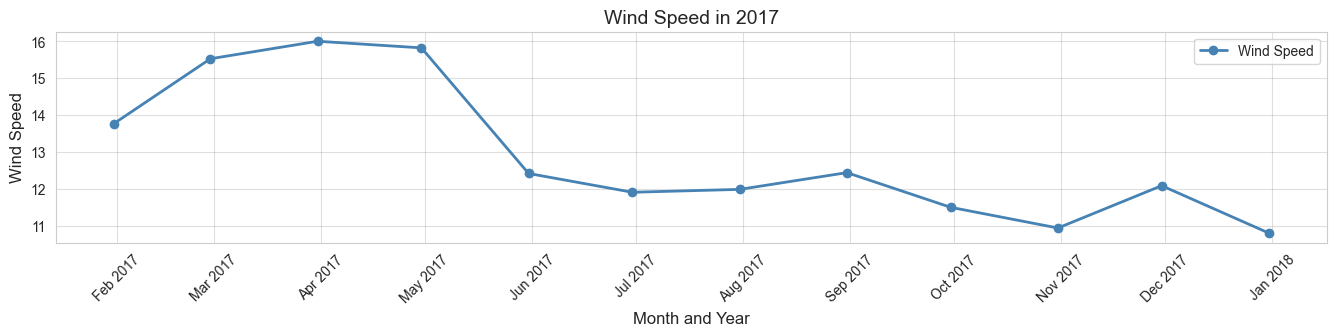

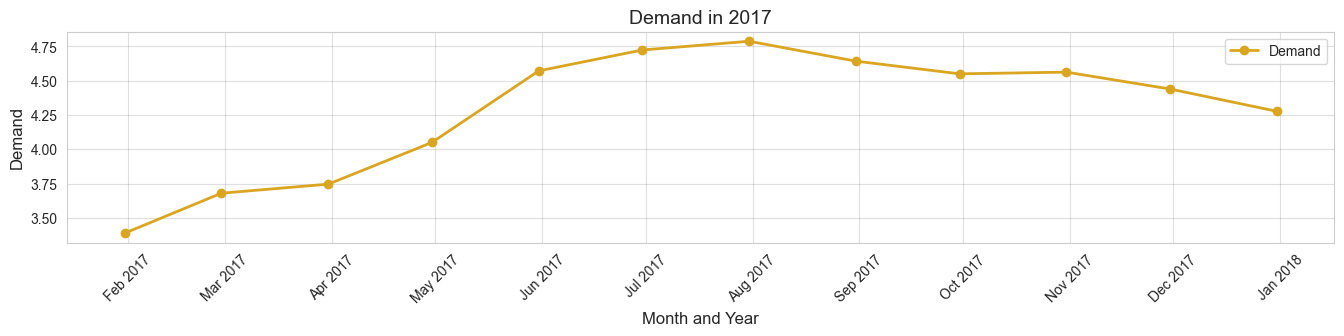

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

df = pd.read_csv('CarSharing_Preprocessed.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df_2017 = df[df['timestamp'].dt.year == 2017]
df_2017.set_index('timestamp', inplace=True)

numeric_cols = df_2017.select_dtypes(include=['number']).columns
monthly_data = df_2017[numeric_cols].resample('M').mean()

sns.set_style('whitegrid')

if set(['temp', 'humidity', 'windspeed', 'demand']).issubset(numeric_cols):
    plot_params = [
        ('temp', 'Temperature', '#DC143C'),
        ('humidity', 'Humidity', '#9C6DA5'),
        ('windspeed', 'Wind Speed', '#4682b4'),
        ('demand', 'Demand', '#DAA520')
    ]
    
    for i, (col, title, color) in enumerate(plot_params, start=1):
        plt.figure(figsize=(14, 4))
        plt.plot(monthly_data[col], marker='o', linestyle='-', color=color, linewidth=2, label=title)
        plt.title(f'{title} in 2017', fontsize=14)
        plt.xlabel('Month and Year', fontsize=12)
        plt.ylabel(f'{title}', fontsize=12)
        
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        plt.xticks(rotation=45)

        plt.grid(True, which='major', linestyle='-', color='gray', alpha=0.25)
        plt.legend()
        
        plt.tight_layout(pad=3.0)
        plt.show()
else:
    print("One or more of the specified columns ('temp', 'humidity', 'windspeed', 'demand') are missing or not numeric.")



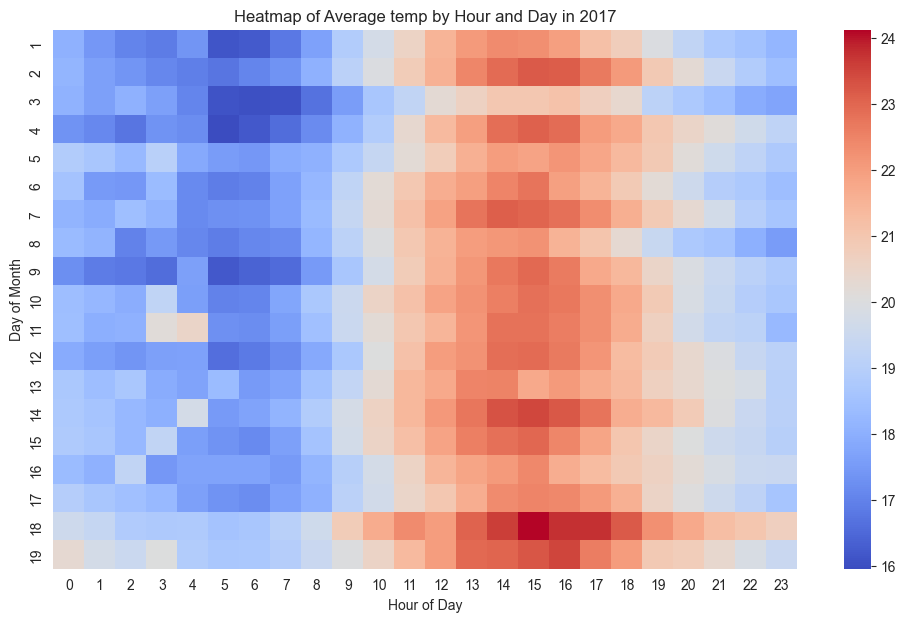

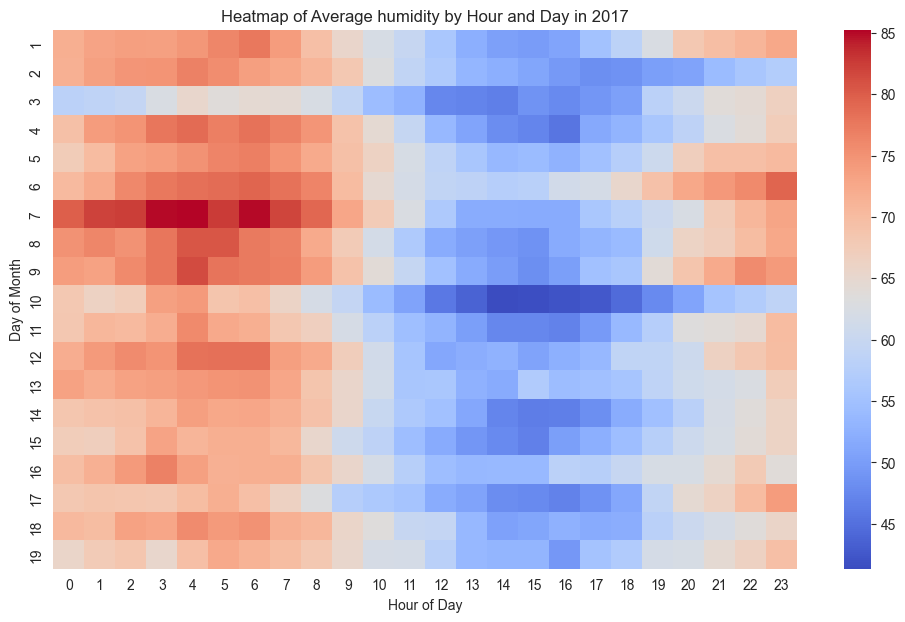

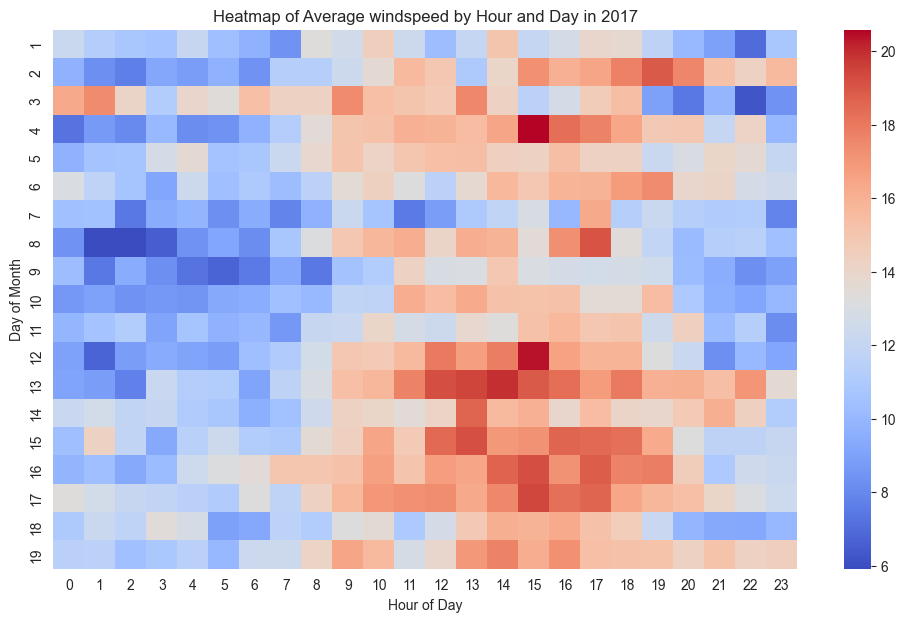

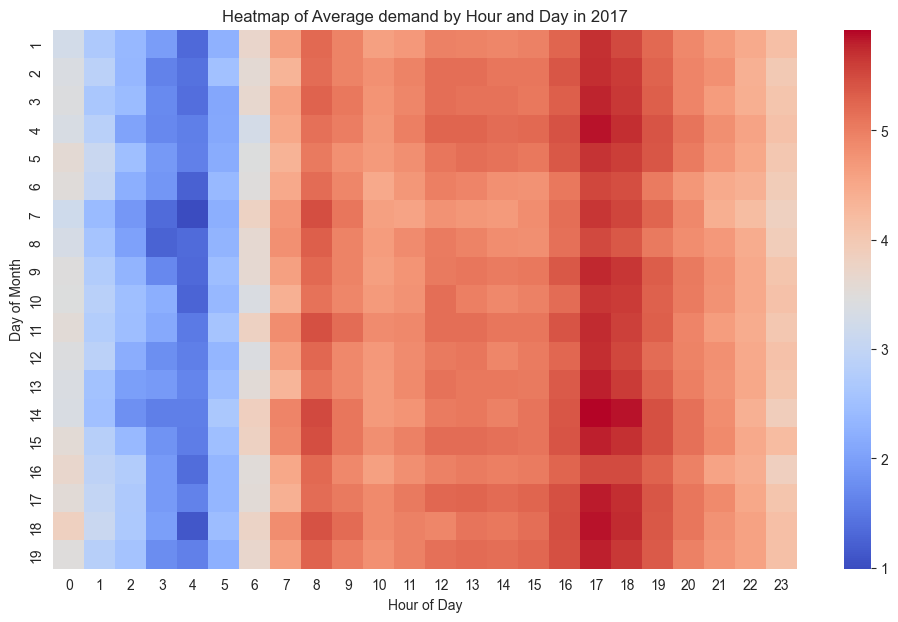

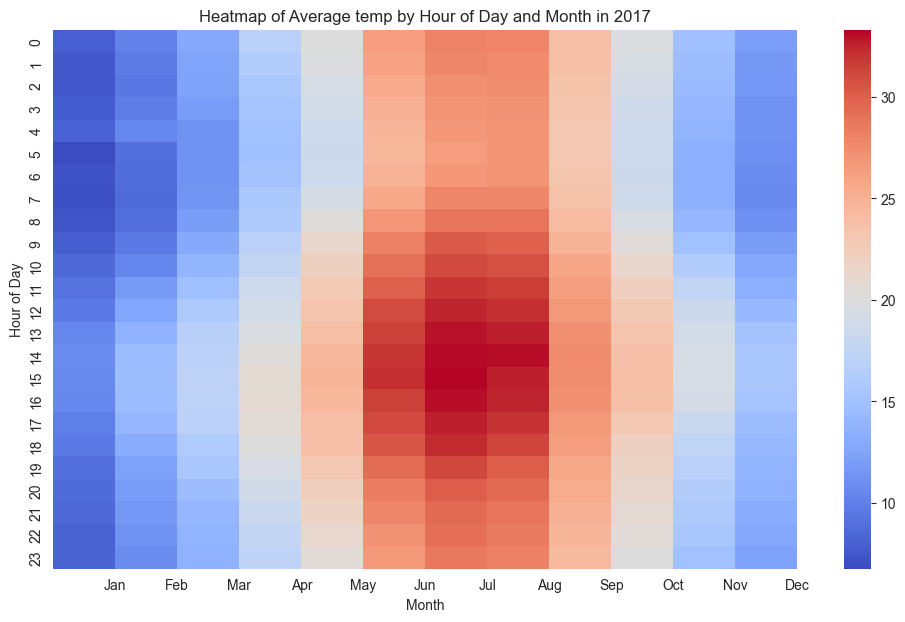

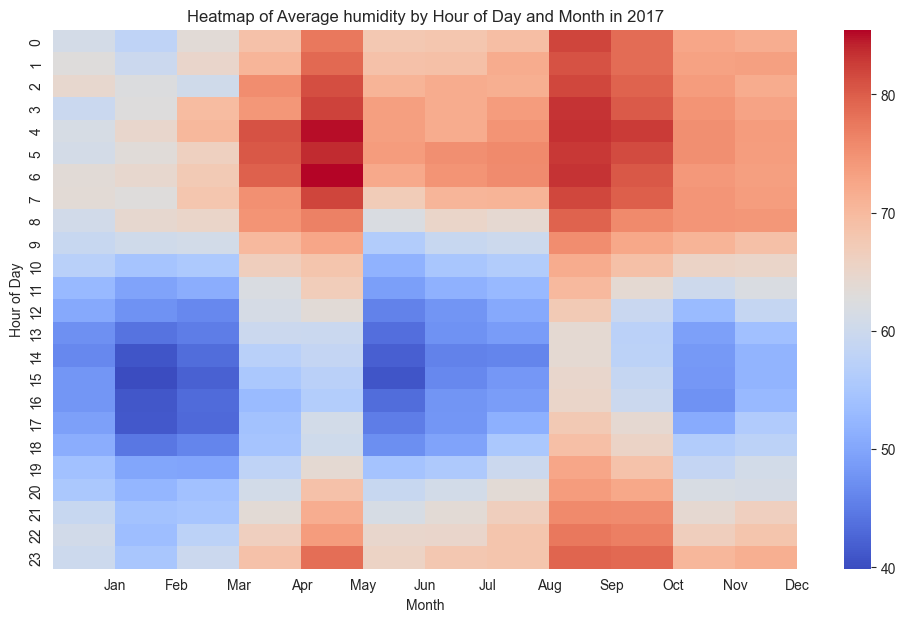

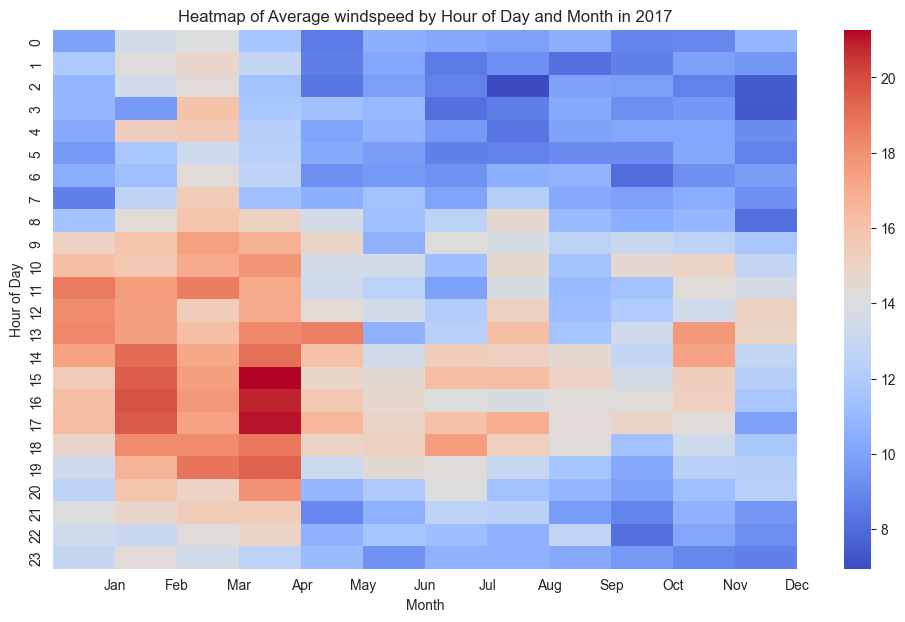

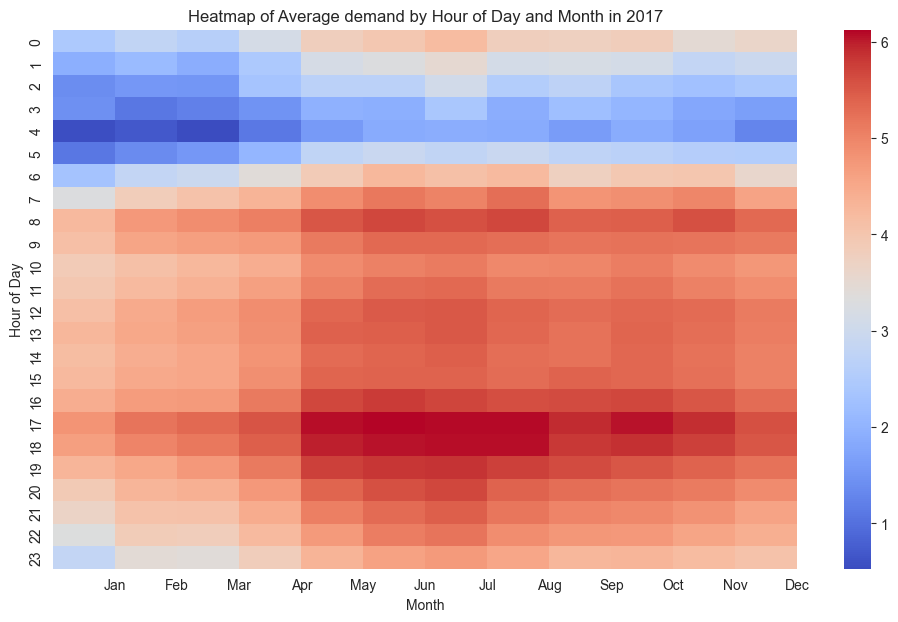

In [2]:
#DAILY and MONTHLY PATTERN#
    
# Data Loading and Preparation
df = pd.read_csv('CarSharing_Preprocessed.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_2017 = df[df['timestamp'].dt.year == 2017].copy()
df_2017.set_index('timestamp', inplace=True)

# List of variables to analyse
variables = ['temp', 'humidity', 'windspeed', 'demand']

# Function to gnerate the heatmap
def create_heatmap(df, index, columns, title_suffix, xlabel, ylabel, figsize=(12, 7), cmap='coolwarm'):
    for var in variables:
        if var in df.columns:
            pivot_table = df.pivot_table(values=var, index=index, columns=columns, aggfunc='mean')
            plt.figure(figsize=figsize)
            sns.heatmap(pivot_table, cmap=cmap, annot=False)
            plt.title(f'Heatmap of Average {var} by {title_suffix} in 2017')
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            if xlabel == 'Month':
                plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
            plt.show()
        else:
            print(f"Variable '{var}' not found in DataFrame.")

# Create 'hour' and 'day' columns
df_2017['hour'] = df_2017.index.hour
df_2017['day'] = df_2017.index.day

# Create heatmaps for hour and day
create_heatmap(df_2017, 'day', 'hour', 'Hour and Day', 'Hour of Day', 'Day of Month')

# Create 'month' column 
df_2017['month'] = df_2017.index.month

# Create heatmaps for hour and month
create_heatmap(df_2017, 'hour', 'month', 'Hour of Day and Month', 'Month', 'Hour of Day')